The data set we’ll be using is a 20,000 row subset of the hflights package provided within the R programming language and sourced originally from __the US Bureau of Transportation Statistics__:
https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0

__A summary / description of the data set can be found here__:
https://cran.r-project.org/web/packages/hflights/hflights.pdf

There are three interesting research / analytical questions I will seek to answer using the data.

### Three interesting research / analytical questions: 
1) What was the most common reason of cancellation?\
2) When (Year/Month/DayofMonth/DayOfWeek) the flights were mostly cancelled?\
3) What airlines(UniqueCarrier) have most of ArrDelay or DepDelay?

In [292]:
import numpy as np
import pandas as pd
import scipy as sp

In [293]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Load Dataset

In [294]:
flight = pd.read_csv('https://raw.githubusercontent.com/sunnypark1026/sunnypark/master/Data%20Analysis/hflights.csv')
flight

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2011,2,25,5,1126.0,1333.0,CO,1719,N19621,187.0,...,8.0,-4.0,IAH,MTJ,926,5.0,30.0,0,NaN,0
19996,2011,2,25,5,941.0,1111.0,CO,1723,N37298,210.0,...,0.0,11.0,IAH,ONT,1334,5.0,12.0,0,NaN,0
19997,2011,2,25,5,722.0,948.0,CO,1746,N37408,146.0,...,-17.0,-3.0,IAH,ORD,925,17.0,14.0,0,NaN,0
19998,2011,2,25,5,1909.0,2216.0,CO,1748,N27239,127.0,...,-10.0,12.0,IAH,FLL,965,6.0,15.0,0,NaN,0


### 1) What was the most common reason of cancellation?
Cancellation Code: reason for cancellation\
__A = carrier, B = weather, C = nationalairsystem, D = security__

In [295]:
# get the 'CancellationCode' values (not NaN values)
Cancel_Reason = pd.DataFrame(flight['CancellationCode'][flight['Cancelled']==1])
# sort values A-D
Cancel_Reason = Cancel_Reason.sort_values(by='CancellationCode')
# sort index
Cancel_Reason.index = list(range(len(Cancel_Reason)))
Cancel_Reason

,CancellationCode
0,A
1,A
2,A
3,A
4,A
...,...
219,C
220,C
221,C
222,C


In [296]:
# check amount of cancellation with length of data
print('A:', len(Cancel_Reason[Cancel_Reason['CancellationCode'] == 'A']))
print('B:', len(Cancel_Reason[Cancel_Reason['CancellationCode'] == 'B']))
print('C:', len(Cancel_Reason[Cancel_Reason['CancellationCode'] == 'C']))
print('D:', len(Cancel_Reason[Cancel_Reason['CancellationCode'] == 'D']))

A: 57
B: 162
C: 5
D: 0


Text(0, 0.5, 'Number of Cancellation')

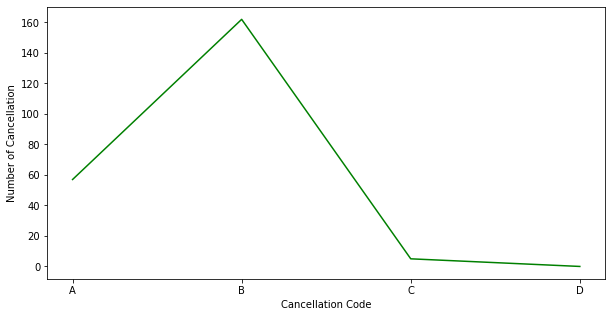

In [312]:
# size
plt.figure(figsize = (10, 5))

# create array with result above
x = np.array(['A','B','C','D'])
y = np.array([57,162,5,0])

# create visualization 
plt.plot(x,y, color='green') 
plt.xlabel('Cancellation Code')
plt.ylabel('Number of Cancellation')

In [298]:
# another try - use query
Cancel_Reason_A = Cancel_Reason.query('CancellationCode == "A"')['CancellationCode']
Cancel_Reason_B = Cancel_Reason.query('CancellationCode == "B"')['CancellationCode']
Cancel_Reason_C = Cancel_Reason.query('CancellationCode == "C"')['CancellationCode']
Cancel_Reason_D = Cancel_Reason.query('CancellationCode == "D"')['CancellationCode']

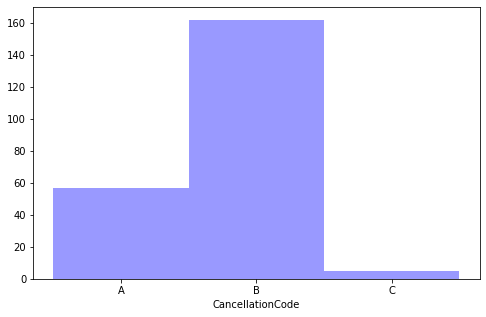

In [299]:
# size
plt.figure(figsize = (8, 5))

sns.distplot(Cancel_Reason_A, bins=1, color = 'blue', kde = False)
sns.distplot(Cancel_Reason_B, bins=1, color = 'blue', kde = False)
sns.distplot(Cancel_Reason_C, bins=1, color = 'blue', kde = False)
sns.distplot(Cancel_Reason_D, bins=1, color = 'blue', kde = False)

In [300]:
# Check one more time with describe method
# According to this result, reason-B shows top amount among the 4 cancellation reasons. 
Cancel_Reason.describe()

,CancellationCode
count,224
unique,3
top,B
freq,162


### According to two visualizations and the result from describe method, B (weather) is the most common reason of cancellation. 

### 2) When (Year/Month/DayofMonth/DayOfWeek) the flights were mostly cancelled?

In [313]:
# get the 'Year','Month','Cancelled' values (where 'Cancelled' has not NaN values)
# sort values by Year	Month	DayofMonth	DayOfWeek
flight2 = flight[['Year','Month','DayofMonth','DayOfWeek','Cancelled']][flight['Cancelled']==1].sort_values(
    by = ['Year','Month','DayofMonth','DayOfWeek'])
# reset index
flight2.index = list(range(len(flight2)))
flight2

,Year,Month,DayofMonth,DayOfWeek,Cancelled
0,2011,1,1,6,1
1,2011,1,1,6,1
2,2011,1,1,6,1
3,2011,1,1,6,1
4,2011,1,2,7,1
...,...,...,...,...,...
219,2011,2,4,5,1
220,2011,2,4,5,1
221,2011,2,4,5,1
222,2011,2,5,6,1


In [314]:
# Create pivot table
flight2_pivot = pd.pivot_table(data = flight2,
                               values='Cancelled',
                               aggfunc='sum',
                               index = ['Year','Month'],
                               columns = ['DayofMonth'])
flight2_pivot = flight2_pivot.fillna(0)
flight2_pivot

DayofMonth   1     2    3    4    5    7    8     9     10    11  ...   19  \
Year Month                                                        ...        
2011 1      4.0  11.0  2.0  2.0  3.0  2.0  1.0  21.0  38.0  29.0  ...  5.0   
     2      7.0   1.0  0.0  5.0  1.0  0.0  0.0   1.0   0.0   0.0  ...  0.0   

DayofMonth   20   24   25    26   27   28   29   30    31  
Year Month                                                 
2011 1      8.0  3.0  2.0  21.0  5.0  4.0  2.0  1.0  19.0  
     2      0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  

[2 rows x 26 columns]

In [304]:
# get values in Series form
flight2_pivot.loc[2011, 1].head(10)

DayofMonth
1      4.0
2     11.0
3      2.0
4      2.0
5      3.0
7      2.0
8      1.0
9     21.0
10    38.0
11    29.0
Name: (2011, 1), dtype: float64

In [305]:
# crete function to create visualization
def create_plot(Year, Month):
    data = flight2_pivot.loc[Year, Month]
    plt.plot(data.index, data.values)

Text(0, 0.5, 'Number of Cancellation')

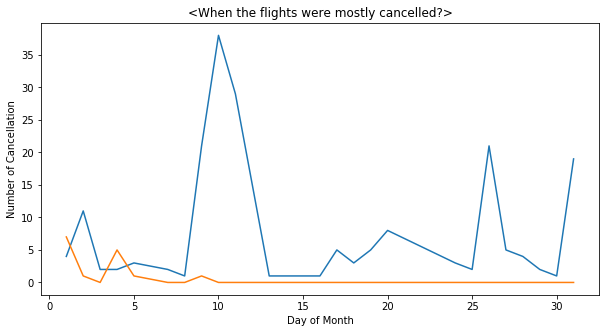

In [306]:
# size
plt.figure(figsize = (10, 5))

# create plots
create_plot(2011, 1) # blue line
create_plot(2011, 2) # Orange line

# put title/labels 
plt.title('<When the flights were mostly cancelled?>') 
plt.xlabel('Day of Month')
plt.ylabel('Number of Cancellation')

### According to the result, the flights were mostly cancelled in 10th day of month, 1st Month, 2011

### 3) What airlines(UniqueCarrier) shows the most cases of ArrDelay and DepDelay?

ArrDelay and DepDelay = arrival and departure delays, in minutes

In [317]:
# Arrival Delay (mean)
Most_ArrDelay = flight[['UniqueCarrier','ArrDelay']].groupby('UniqueCarrier').mean().sort_values(by = 'UniqueCarrier')
Most_ArrDelay.head(5)

,ArrDelay
UniqueCarrier,
AA,0.950397
AS,9.396552
B6,11.086022
CO,5.366780
DL,4.310924


In [318]:
Most_ArrDelay['ArrDelay']

UniqueCarrier
AA     0.950397
AS     9.396552
B6    11.086022
CO     5.366780
DL     4.310924
EV    13.927083
F9    13.725806
FL     1.624060
MQ     7.144615
OO     5.743106
UA    -2.234694
US    -3.595960
WN     8.644941
XE     3.613172
Name: ArrDelay, dtype: float64

In [319]:
# Departure Delay (mean)
Most_DepDelay = flight[['UniqueCarrier','DepDelay']].groupby('UniqueCarrier').mean().sort_values(by = 'UniqueCarrier')
Most_DepDelay.head(5)

,DepDelay
UniqueCarrier,
AA,5.610672
AS,4.559322
B6,18.234043
CO,9.881251
DL,8.033613


In [320]:
Most_DepDelay['DepDelay']

UniqueCarrier
AA     5.610672
AS     4.559322
B6    18.234043
CO     9.881251
DL     8.033613
EV    21.742268
F9     6.306452
FL     3.939850
MQ     9.901538
OO     6.692197
UA     3.909091
US     1.494983
WN    14.394336
XE     3.846657
Name: DepDelay, dtype: float64

Text(0, 0.5, 'Arrival Delay(blue)\nDeparture Delay(green)')

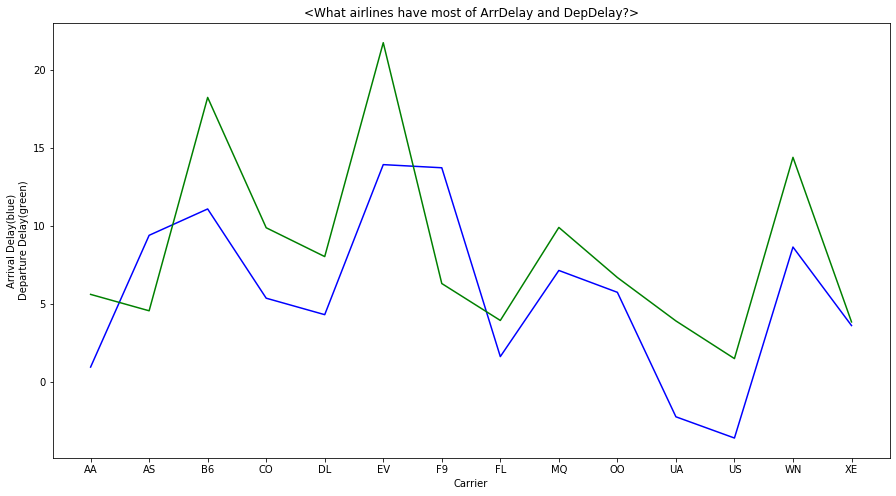

In [321]:
# set size
plt.figure(figsize = (15, 8))

# create plots
plt.plot(Most_ArrDelay['ArrDelay'].index, Most_ArrDelay['ArrDelay'].values, color = 'blue')
plt.plot(Most_DepDelay['DepDelay'].index, Most_DepDelay['DepDelay'].values, color = 'green')

# put title/labels 
plt.title('<What airlines have most of ArrDelay and DepDelay?>') 
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay(blue)\nDeparture Delay(green)')

### According to visualization, EV(Express Jet) shows the most Arrival Delay & Departure Delay cases (used mean value)